# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## Test <a href=http://www.ramp.studio/problems/iris>RAMP on iris</a> 

<i> Balázs Kégl (LAL/CNRS)</i>

## Introduction

Iris is a small standard multi-class classification data set from the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">UCI Machine Learning Repository</a>.

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [2]:
local_filename = 'data/train.csv'

# Open file and print the first 3 lines
with open(local_filename) as fid:
    for line in fid.readlines()[:3]:
        print(line)

sepal width,petal length,petal width,species

3.5,1.6,0.6,setosa

2.8,4.7,1.2,versicolor



In [3]:
data = pd.read_csv(local_filename)

In [4]:
data.head()

,sepal width,petal length,petal width,species
0,3.5,1.6,0.6,setosa
1,2.8,4.7,1.2,versicolor
2,2.8,4.8,1.4,versicolor
3,3.1,5.6,2.4,virginica
4,2.0,3.5,1.0,versicolor


In [5]:
data.shape

(96, 4)

In [6]:
data.describe()

,sepal width,petal length,petal width
count,96.000000,96.000000,96.000000
mean,3.028125,3.742708,1.214583
std,0.430349,1.752397,0.783377
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.450000,1.300000
75%,3.300000,5.125000,1.825000
max,4.200000,6.700000,2.500000


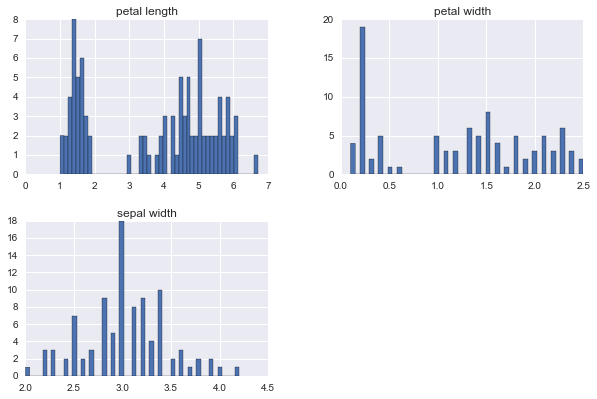

In [7]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 2));

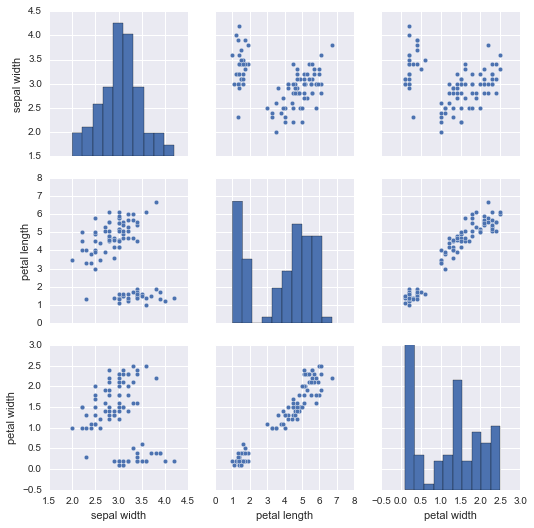

In [8]:
sns.pairplot(data);

## Building predictive models

The initial classifier in your sandbox. The following cell is *not* executed in the notebook, rather it saves its content in the file in the first line, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [19]:
%%file submissions/starting_kit/classifier.py
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.clf = RandomForestClassifier(
            n_estimators=1, max_leaf_nodes=2, random_state=61)
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)



Overwriting submissions/starting_kit/classifier.py


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit).

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python file `classifier.py` is in the  [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](http://localhost:8890/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [20]:
!ramp_test_submission

Testing Iris classification
Reading train and test files from ./data ...
Training ./submissions/starting_kit ...
CV fold 0
	train acc = 0.58
	valid acc = 0.65
	test acc = 0.71
	train err = 0.42
	valid err = 0.35
	test err = 0.29
	train nll = 1.17
	valid nll = 0.52
	test nll = 0.8
/Users/kegl/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
	train f1_70 = 0.33
	valid f1_70 = 0.33
	test f1_70 = 0.67
CV fold 1
	train acc = 0.63
	valid acc = 0.65
	test acc = 0.54
	train err = 0.37
	valid err = 0.35
	test err = 0.46
	train nll = 0.78
	valid nll = 0.66
	test nll = 0.72
	train f1_70 = 0.67
	valid f1_70 = 0.67
	test f1_70 = 0.33
CV fold 2
	train acc = 0.62
	valid acc = 0.7
	test acc = 0.46
	train err = 0.38
	valid err = 0.3
	test err = 0.54
	train nll = 1.52
	valid nll = 0.65
	test nll = 3.43
	train f1_70 = 0.33
	val

Alternatively, load and execute `rampwf.utils.testing.py`, and call `assert_submission`. This may be useful if you would like to understand how we instantiate the workflow, the scores, the data connectors, and the cross validation scheme defined in [`problem.py`](problem.py), and how we insert and train/test your submission.

In [11]:
# %load https://raw.githubusercontent.com/paris-saclay-cds/ramp-workflow/master/rampwf/utils/testing.py

In [18]:
# assert_submission()

## Submitting to [ramp.studio](http://ramp.studio)

Once you found a good classifier, you can submit it to [ramp.studio](http://www.ramp.studio). First, if it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then find an open event on the particular problem, for example, the event [iris_test](http://www.ramp.studio/events/iris_test) for this RAMP. Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/iris_test/sandbox) and copy-paste (or upload) [`classifier.py`](http://localhost:8890/edit/submissions/starting_kit/classifier.py) from `submissions/starting_kit`. Save it, rename it, then submit it. The submission is trained and tested on our backend in the same way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/iris_test/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/iris_test/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/iris_test/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 
```
----------------------------
train acc = 0.62 ± 0.033
train err = 0.38 ± 0.033
train nll = 1.01 ± 0.378
train f1_70 = 0.5 ± 0.167
valid acc = 0.63 ± 0.06
valid err = 0.38 ± 0.06
valid nll = 1.41 ± 1.115
valid f1_70 = 0.5 ± 0.167
test acc = 0.55 ± 0.084
test err = 0.45 ± 0.084
test nll = 1.31 ± 0.858
test f1_70 = 0.4 ± 0.133
```
The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/iris_test/leaderboard)) is accuracy ("acc"), so the line that is relevant in the output of `ramp_test_submission` is `valid acc = 0.63 ± 0.06`. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Contact

Don't hesitate to [contact us](mailto:admin@ramp.studio?subject=iris notebook).